In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load dataset
url = "1-bostonHousing.csv"
df = pd.read_csv(url)

In [3]:
# Handle missing values
df = df.fillna(df.mean())  # Fill missing values with mean

In [5]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT

In [6]:
# Prepare features (X) and target (y) for Boston housing price prediction
"""
df: Your dataset, likely a pandas DataFrame containing Boston housing data.
.drop(columns=["MEDV"], axis=1): Removes the column MEDV from the DataFrame — 
this gives you only the features (like number of rooms, crime rate, etc.).
.values: Converts the resulting DataFrame to a NumPy array (used for model input).
X: Now contains the input features (independent variables).
"""

X = df.drop(columns=["MEDV"], axis=1).values  # Features
y = df["MEDV"].values.reshape(-1, 1)           # Target

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

"""
# train_test_split: Splits data into training and testing sets.
# X, y: Input features and target values.
# test_size=0.2: 20% of the data is used for testing, 80% for training.
# random_state=42: Ensures reproducibility of the split.
# X_train, y_train: Training data used to train the model.
# X_test, y_test: Testing data used to evaluate the model's performance.

"""

"\n# train_test_split: Splits data into training and testing sets.\n# X, y: Input features and target values.\n# test_size=0.2: 20% of the data is used for testing, 80% for training.\n# random_state=42: Ensures reproducibility of the split.\n# X_train, y_train: Training data used to train the model.\n# X_test, y_test: Testing data used to evaluate the model's performance.\n\n"

In [8]:
# Normalize features and target
scaler_X = StandardScaler()  # Scales input features to have mean=0 and std=1
scaler_y = StandardScaler()  # Scales target values similarly for better model performance

In [9]:
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test) 

In [10]:
X_train = scaler_X.fit_transform(X_train)  # Fit scaler on training features and transform them
X_test = scaler_X.transform(X_test)        # Transform test features using the same scaler
y_train = scaler_y.fit_transform(y_train)  # Fit scaler on training target and transform
y_test = scaler_y.transform(y_test)        # Transform test target using the same scaler 

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Define DNN Model
class DNNRegression(nn.Module):
    def __init__(self):
        super(DNNRegression, self).__init__()
        self.hidden1 = nn.Linear(13, 64)  # Input layer to first hidden layer (13 features to 64 neurons)
        self.hidden2 = nn.Linear(64, 32)  # First hidden layer to second hidden layer (64 to 32 neurons)
        self.output = nn.Linear(32, 1)    # Second hidden layer to output (1 neuron for regression output)
        self.relu = nn.ReLU()             # ReLU activation function

    def forward(self, x):
        x = self.relu(self.hidden1(x))    # Apply first layer + ReLU
        x = self.relu(self.hidden2(x))    # Apply second layer + ReLU
        x = self.output(x)                # Final output (no activation for regression)
        return x

# Initialize model, loss function, and optimizer
model = DNNRegression()                  # Create model instance
criterion = nn.MSELoss()                 # Mean Squared Error for regression loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

# Training loop
epochs = 500                             # Number of training epochs
for epoch in range(epochs):
    model.train()                        # Set model to training mode
    optimizer.zero_grad()               # Clear previous gradients
    outputs = model(X_train_tensor)     # Forward pass: get predictions
    loss = criterion(outputs, y_train_tensor)  # Compute loss between predictions and true values
    loss.backward()                     # Backpropagation: compute gradients
    optimizer.step()                    # Update model weights

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')  # Print loss every 50 epochs


Epoch [50/500], Loss: 0.0712
Epoch [100/500], Loss: 0.0374
Epoch [150/500], Loss: 0.0245
Epoch [200/500], Loss: 0.0172
Epoch [250/500], Loss: 0.0140
Epoch [300/500], Loss: 0.0111
Epoch [350/500], Loss: 0.0083
Epoch [400/500], Loss: 0.0078
Epoch [450/500], Loss: 0.0067
Epoch [500/500], Loss: 0.0060


In [12]:
# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Save the model
torch.save(model.state_dict(), "boston_dnn_model.pth")  # Save model weights to a file
print("Model saved successfully!")

# Evaluate model
model.eval()                                # Set model to evaluation mode (disables dropout, etc.)
with torch.no_grad():                       # Disable gradient computation for efficiency
    y_pred = model(X_test_tensor)           # Make predictions on test data
    test_loss = criterion(y_pred, y_test_tensor)  # Compute test loss (MSE)
    print(f'Test Loss: {test_loss.item():.4f}')   # Print test loss value


Model saved successfully!
Test Loss: 0.1168


In [13]:
# Convert predictions back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred.numpy())  # Convert predicted values back to original scale
y_test_original = scaler_y.inverse_transform(y_test_tensor.numpy())  # Convert actual test values back to original scale


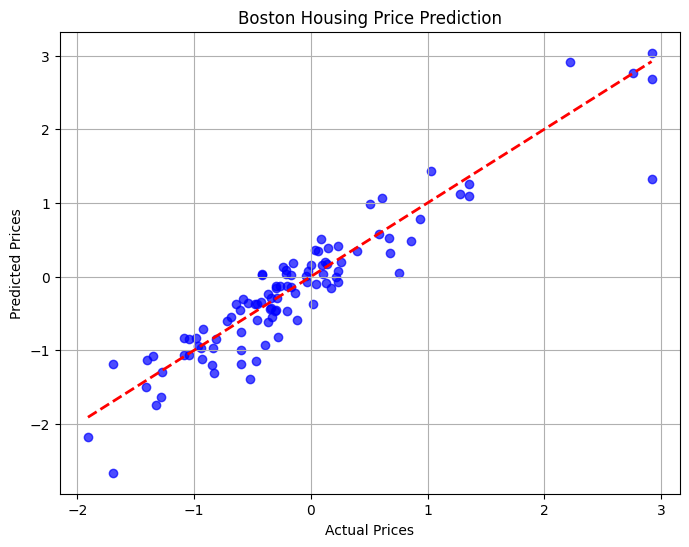

In [14]:
# Display results
plt.figure(figsize=(8, 6))  # Create a figure with specified size
plt.scatter(y_test_original, y_pred_original, alpha=0.7, color='blue')  # Scatter plot of actual vs predicted prices
plt.plot(
    [y_test_original.min(), y_test_original.max()],
    [y_test_original.min(), y_test_original.max()],
    color='red', linestyle='--', linewidth=2  # Red diagonal line representing perfect prediction
)
plt.xlabel("Actual Prices")  # Label for the x-axis
plt.ylabel("Predicted Prices")  # Label for the y-axis
plt.title("Boston Housing Price Prediction")  # Title of the plot
plt.grid(True)  # Display grid for better readability
plt.show()  # Show the plot